In [8]:
# !python3 -m pip install seaborn
# ! pip install pymc3
# ! pip install arviz
! pip install --upgrade pandas

zsh:1: /usr/local/bin/pip: bad interpreter: /System/Library/Frameworks/Python.framework/Versions/2.7/Resources/Python.app/Contents/MacOS/Python: no such file or directory
  Using cached pandas-1.5.2-cp39-cp39-macosx_10_9_x86_64.whl (12.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.2
    Uninstalling pandas-1.4.2:
      Successfully uninstalled pandas-1.4.2


In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import numpy as np
from tqdm import tqdm
import scipy.stats as stats
import itertools
import pandas as pd
# import pymc3 as pm
# import arviz as az
from datetime import datetime as dt
import igraph as ig
# from statsmodels.stats.weightstats import ztest

In [2]:
## Matplotlib defaults ##
colors = {"5": "#aa0f35", 
         "6": "#fdc799",
         "7": "#a0a75c",
         "8": "#603734",
         "9": "#abdbfc",
         "10": "#313a61",
         "15": "#bfbad5",
         "20": "#f89b00",
         "full": "#313862",
         "new": "#FAB124"}

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rcParams.update({'font.size': 22})
plt.style.use("dark_background")

# Overview

Analyze assembly index calculations across patent data. These calculations are from random samples of compounds present in each month from 1980-2019.

//TODO: sample from new compounds added in each month

In [3]:
fp = "Data/AssemblyValues/assembly_values_1000_1980.p"
assembly_values = pickle.load(file=open(fp, "rb"))

In [ ]:
print(assembly_values[100:199])

In [4]:
def build_month_increments(start, stop):
    """ Build all monthly increments from the start year to stop year in the
    format YEAR-MONTH

    Args:
        start (int): start year of increments
        stop (int): end year of increments

    Returns:
        list: list of strings holding the YEAR-MONTH increments
    """
    months = []
    while start <= stop:
        for month in [
                "01", "02", "03", "04", "05", "06", "07", "08", "09", "10",
                "11", "12"
        ]:
            months.append(str(start) + "-" + month)
        start += 1

    return months

In [5]:
months = build_month_increments(1980, 1980)
print(months)

['1980-01', '1980-02', '1980-03', '1980-04', '1980-05', '1980-06', '1980-07', '1980-08', '1980-09', '1980-10', '1980-11', '1980-12']


# New / Total Compound Assemblies (AssemblyGo)

Read in AssemblyGo results, split data into months, graph from there


In [3]:
#Read in full and new dataframes
fp = "Data/AssemblyValues/"
full_df = pd.read_csv(fp + "FullDatabase_AssemblyGo.csv")
new_df = pd.read_csv(fp + "NewDatabase_AssemblyGo.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Data/AssemblyValues/FullDatabase_AssemblyGo.csv'

In [39]:
print(full_df.head())

   Unnamed: 0           label  MA_assemblyGo
0           0  1994-03_365031             13
1           1  1994-09_370717             11
2           2   2017-11_80436             22
3           3  2010-04_214306              9
4           4  2005-11_267327             12


In [42]:
def get_month(label):
    """ Isolates the month from the given label

    Args:
        label (str): compound id in the form YYYY-MM_label

    Returns:
        str: YYYY-MM of a particular compound
    """
    return str(label)[:7]

In [43]:
#Apply to full and new dataframes
tqdm.pandas()

full_df["month"] = full_df["label"].apply(get_month)
new_df["month"] = new_df["label"].apply(get_month)

full_df = full_df.dropna()
new_df = new_df.dropna()

print(full_df)


        Unnamed: 0           label  MA_assemblyGo    month
0                0  1994-03_365031             13  1994-03
1                1  1994-09_370717             11  1994-09
2                2   2017-11_80436             22  2017-11
3                3  2010-04_214306              9  2010-04
4                4  2005-11_267327             12  2005-11
...            ...             ...            ...      ...
467872      467872  2018-01_433720             21  2018-01
467873      467873  2016-12_420694             30  2016-12
467874      467874  1997-05_238251              7  1997-05
467875      467875  1993-03_283329             24  1993-03
467876      467876  1982-10_184989             16  1982-10

[466872 rows x 4 columns]


In [44]:
full_stats = full_df.groupby(["month"]).agg({"MA_assemblyGo":["mean","std"]})
new_stats = new_df.groupby(["month"]).agg({"MA_assemblyGo":["mean","std"]})

full_stats = full_stats.dropna(axis=0)
new_stats = new_stats.dropna(axis=0)

print(full_stats)
print("----------------------------------")
print(new_stats)


        MA_assemblyGo          
                 mean       std
month                          
1980-01     11.427544  5.496739
1980-02     11.637985  5.959078
1980-03     11.574227  5.817411
1980-04     11.903704  6.119765
1980-05     11.895228  6.340823
...               ...       ...
2019-08     17.795753  8.946237
2019-09     17.927329  9.091736
2019-10     18.435664  9.492319
2019-11     17.867147  9.534088
2019-12     16.433943  9.277880

[480 rows x 2 columns]
----------------------------------
        MA_assemblyGo          
                 mean       std
month                          
1980-01     14.143757  6.157706
1980-02     13.960581  5.858003
1980-03     13.801031  5.717696
1980-04     14.392968  6.179733
1980-05     13.453305  5.613438
...               ...       ...
2019-08     20.486815  8.461578
2019-09     20.653846  8.786538
2019-10     21.712398  9.869216
2019-11     21.838843  9.482737
2019-12     20.366935  9.087557

[480 rows x 2 columns]


  0%|          | 0/467877 [02:29<?, ?it/s]


Text(0, 0.5, 'Assembly Index')

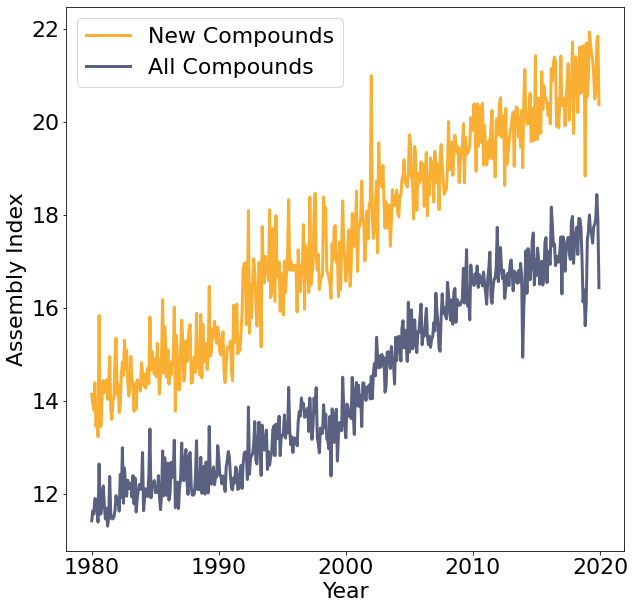

In [13]:
#Assembly values with standard deviation
plt.figure(figsize=(10,10))

plt.plot(np.arange(1980, 2020, 1/12), new_stats["MA_assemblyGo"]["mean"], color="#f89b00",
            linewidth=3, markersize=10, alpha=0.8, label="New Compounds")

plt.plot(np.arange(1980, 2020, 1/12), full_stats["MA_assemblyGo"]["mean"], color="#313a61",
            linewidth=3, markersize=10, alpha=0.8, label="All Compounds")

plt.legend()
plt.xlabel("Year")
plt.ylabel("Assembly Index")

## Time series prediction

"Moore's Law of MA" - Lee

In [9]:
# Turn dates into ordinal values (for training purposes)
months = pd.Series(full_stats.index) + "-01"

ordinals = []
datetimes = []
for date in months:
    ordinals.append(dt.strptime(date, '%Y-%m-%d').date().toordinal())
    datetimes.append(dt.strptime(date, '%Y-%m-%d').date())

full_stats["date"] = ordinals
new_stats["date"] = ordinals
print(full_stats)
print("----------")
print(new_stats)

        MA_assemblyGo              date
                 mean       std        
month                                  
1980-01     11.427544  5.496739  722815
1980-02     11.637985  5.959078  722846
1980-03     11.574227  5.817411  722875
1980-04     11.903704  6.119765  722906
1980-05     11.895228  6.340823  722936
...               ...       ...     ...
2019-08     17.795753  8.946237  737272
2019-09     17.927329  9.091736  737303
2019-10     18.435664  9.492319  737333
2019-11     17.867147  9.534088  737364
2019-12     16.433943  9.277880  737394

[480 rows x 3 columns]
----------
        MA_assemblyGo              date
                 mean       std        
month                                  
1980-01     14.143757  6.157706  722815
1980-02     13.960581  5.858003  722846
1980-03     13.801031  5.717696  722875
1980-04     14.392968  6.179733  722906
1980-05     13.453305  5.613438  722936
...               ...       ...     ...
2019-08     20.486815  8.461578  737272
2019-

In [10]:
# Number of samples
n = len(new_stats)

x = new_stats["date"].values.reshape(n, 1)
new_y = new_stats["MA_assemblyGo"]["mean"].values.reshape(n, 1)
full_y = new_stats["MA_assemblyGo"]["mean"].values.reshape(n, 1)

# Train-test split (train on 70%)
prop_train = 0.7
n_train = round(prop_train * n)

In [11]:
#Train new values first
x_train = x[:n_train]
y_train = new_y[:n_train]

x_test = x[n_train:]
y_test = new_y[n_train:]

### Gaussian Process

Using https://juanitorduz.github.io/gp_ts_pymc3/ for help

In [77]:
#Set up & train prediction model

with pm.Model() as model:
    # Use a squared exponential kernal, default (?) parameters
    l = 10.0
    tau = 2.0
    b = 0.5
    cov = b + tau + pm.gp.cov.ExpQuad(1, l)

    # # Squared exponential didn't work - let's try default linear instead (failed! And takes ~30 minutes)
    # cov = pm.gp.cov.Linear(input_dim=1, c=pm.Normal(name="c_3", mu=1, sigma=2))

    gp = pm.gp.Marginal(cov_func=cov)

    #Noise (if necessary?)
    sigma = pm.HalfNormal(name="sigma", sigma=10)

    #Likelihood
    y_pred = gp.marginal_likelihood("y_pred", X=x_train, y=y_train.flatten(), noise=sigma)

    #Sample
    trace = pm.sample(draws=500, chains=2, tune=500)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sigma]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 96 seconds.


In [78]:
# Train 
with model:
    x_train_conditional_2 = gp.conditional("x_train_conditional_2", x_train)
    y_train_pred_samples = pm.fast_sample_posterior_predictive(trace, var_names=["x_train_conditional_2"], samples=100)

    x_test_conditional_2 = gp.conditional("x_test_conditional_2", x_test)
    y_test_pred_samples = pm.fast_sample_posterior_predictive(trace, var_names=["x_test_conditional_2"], samples=100)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pymc3/distributions/posterior_predictive.py:248: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


In [79]:
#Prediction sample statistics
y_train_pred_samples_mean = y_train_pred_samples['x_train_conditional_2'].mean(axis=0)
y_train_pred_samples_std = y_train_pred_samples['x_train_conditional_2'].std(axis=0)
y_train_pred_samples_mean_plus = y_train_pred_samples_mean + 2*y_train_pred_samples_std
y_train_pred_samples_mean_minus = y_train_pred_samples_mean - 2*y_train_pred_samples_std
# Test
y_test_pred_samples_mean = y_test_pred_samples['x_test_conditional_2'].mean(axis=0)
y_test_pred_samples_std = y_test_pred_samples['x_test_conditional_2'].std(axis=0)
y_test_pred_samples_mean_plus = y_test_pred_samples_mean + 2*y_test_pred_samples_std
y_test_pred_samples_mean_minus = y_test_pred_samples_mean - 2*y_test_pred_samples_std


[Text(0.5, 1.0, 'Model Predictions'), Text(0.5, 0, 't'), Text(0, 0.5, '')]

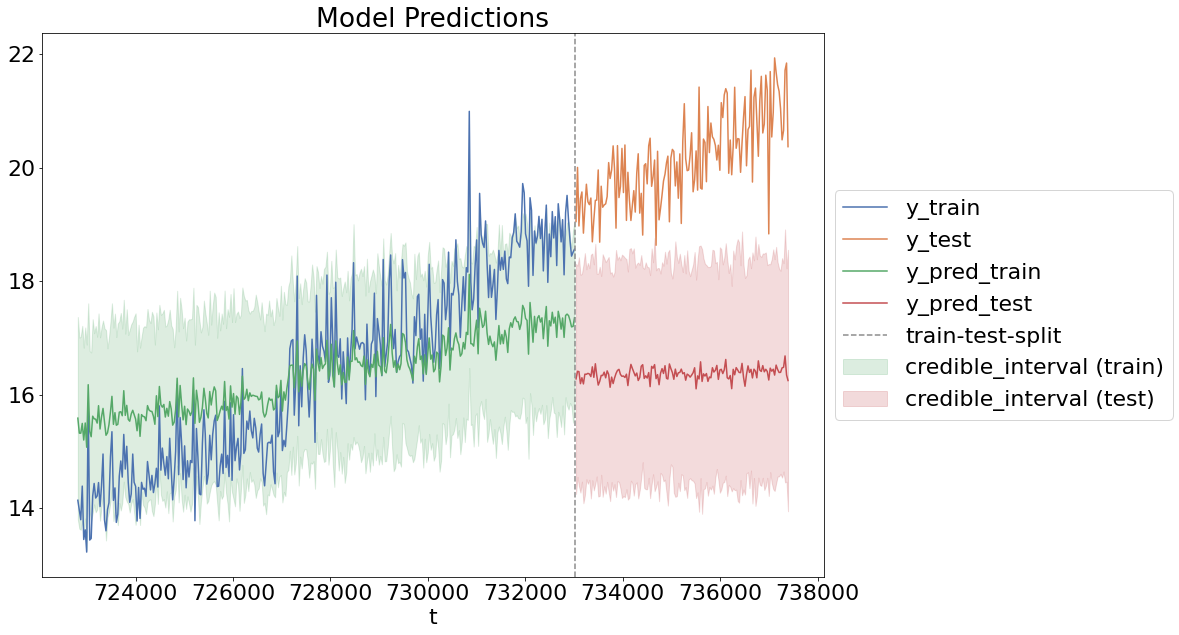

In [80]:
fig, ax = plt.subplots(figsize=(14,10))

sns_c = sns.color_palette(palette='deep')

sns.lineplot(x=x_train.flatten(), y=y_train.flatten(), color=sns_c[0], label='y_train', ax=ax)
sns.lineplot(x=x_test.flatten(), y=y_test.flatten(), color=sns_c[1], label='y_test', ax=ax)
ax.fill_between(
    x=x_train.flatten(), 
    y1=y_train_pred_samples_mean_minus, 
    y2=y_train_pred_samples_mean_plus, 
    color=sns_c[2], 
    alpha=0.2, 
    label='credible_interval (train)'
)
sns.lineplot(x=x_train.flatten(), y=y_train_pred_samples_mean, color=sns_c[2], label='y_pred_train', ax=ax)
ax.fill_between(
    x=x_test.flatten(), 
    y1=y_test_pred_samples_mean_minus, 
    y2=y_test_pred_samples_mean_plus, 
    color=sns_c[3], 
    alpha=0.2, 
    label='credible_interval (test)'
)
sns.lineplot(x=x_test.flatten(), y=y_test_pred_samples_mean, color=sns_c[3], label='y_pred_test', ax=ax)
ax.axvline(x=x_train.flatten()[-1], color=sns_c[7], linestyle='--', label='train-test-split')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='Model Predictions', xlabel='t', ylabel='')


### AutoAIRMA

Using first test in https://towardsdatascience.com/3-unique-python-packages-for-time-series-forecasting-2926a09aaf5b

In [35]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, AutoETS, SimpleExponentialSmoothing

In [45]:
## Get dataframes with dates (necessary for the AutoARIMA model)
full_df = full_df.groupby(["month"]).agg({"MA_assemblyGo":["mean","std"]}).reset_index()

new_df = new_df.groupby(["month"]).agg({"MA_assemblyGo":["mean","std"]}).reset_index()

print(full_df)

       month MA_assemblyGo          
                      mean       std
0    1980-01     11.427544  5.496739
1    1980-02     11.637985  5.959078
2    1980-03     11.574227  5.817411
3    1980-04     11.903704  6.119765
4    1980-05     11.895228  6.340823
..       ...           ...       ...
475  2019-08     17.795753  8.946237
476  2019-09     17.927329  9.091736
477  2019-10     18.435664  9.492319
478  2019-11     17.867147  9.534088
479  2019-12     16.433943  9.277880

[480 rows x 3 columns]


In [56]:
#Ensure proper dataframe setup (remove groupby association, change month to datetimes)
full_df_SF = pd.DataFrame()
full_df_SF["ds"] = datetimes
full_df_SF["y"] = full_df["MA_assemblyGo"]["mean"]
full_df_SF["unique_id"] = [0] * len(full_df_SF)
full_df_SF = full_df_SF.set_index("unique_id")
full_df_SF.reset_index()
print(full_df_SF)

print("----------")

new_df_SF = pd.DataFrame()
new_df_SF["ds"] = datetimes
new_df_SF["y"] = new_df["MA_assemblyGo"]["mean"]
new_df_SF["unique_id"] = [0] * len(new_df_SF)
new_df_SF = new_df_SF.set_index("unique_id")
new_df_SF.reset_index()

print(new_df_SF)


                   ds          y
unique_id                       
0          1980-01-01  11.427544
0          1980-02-01  11.637985
0          1980-03-01  11.574227
0          1980-04-01  11.903704
0          1980-05-01  11.895228
...               ...        ...
0          2019-08-01  17.795753
0          2019-09-01  17.927329
0          2019-10-01  18.435664
0          2019-11-01  17.867147
0          2019-12-01  16.433943

[480 rows x 2 columns]
----------
                   ds          y
unique_id                       
0          1980-01-01  14.143757
0          1980-02-01  13.960581
0          1980-03-01  13.801031
0          1980-04-01  14.392968
0          1980-05-01  13.453305
...               ...        ...
0          2019-08-01  20.486815
0          2019-09-01  20.653846
0          2019-10-01  21.712398
0          2019-11-01  21.838843
0          2019-12-01  20.366935

[480 rows x 2 columns]


In [57]:
## Set up training/test dataframes
Y_trainNEW_df = new_df_SF[:n_train]
Y_testNEW_df = new_df_SF[n_train:]

Y_trainFULL_df = full_df_SF[:n_train]
Y_testFULL_df = full_df_SF[n_train:]

print(Y_trainNEW_df.head())
print("-----")
print(Y_trainFULL_df.head())

                   ds          y
unique_id                       
0          1980-01-01  14.143757
0          1980-02-01  13.960581
0          1980-03-01  13.801031
0          1980-04-01  14.392968
0          1980-05-01  13.453305
-----
                   ds          y
unique_id                       
0          1980-01-01  11.427544
0          1980-02-01  11.637985
0          1980-03-01  11.574227
0          1980-04-01  11.903704
0          1980-05-01  11.895228


In [58]:
## Set up model parameters

season_length = 12 #example is built on 12-month-long cyclical data, but this might work for me too...
horizon = len(Y_testNEW_df)

models = [
AutoARIMA(season_length = season_length),
AutoETS(season_length = season_length, model='ZZZ'),
SimpleExponentialSmoothing(0.99)
]

modelNEW = StatsForecast(
df=Y_trainNEW_df,
models=models,
freq='M',
n_jobs=-1)

modelFULL = StatsForecast(
df=Y_trainFULL_df,
models=models,
freq='M',
n_jobs=-1)

In [59]:
## NOTE: takes ~5 seconds

Y_hatNEW_df = modelNEW.forecast(horizon + 48, level=[95]).reset_index()
Y_hatNEW_df.head()

,unique_id,ds,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-hi-95,AutoETS,AutoETS-lo-95,AutoETS-hi-95,SES
0,0,2007-12-31,18.677120,17.476065,19.878174,18.935757,17.743162,20.128351,18.562082
1,0,2008-01-31,18.711241,17.493570,19.928911,18.950563,17.752354,20.148771,18.562082
2,0,2008-02-29,18.754230,17.520166,19.988295,18.965370,17.761560,20.169178,18.562082
3,0,2008-03-31,18.709227,17.458984,19.959469,18.980177,17.770781,20.189571,18.562082
4,0,2008-04-30,18.820787,17.554573,20.087000,18.994984,17.780016,20.209949,18.562082


In [60]:
Y_hatFULL_df = modelFULL.forecast(horizon + 48, level=[95]).reset_index()
Y_hatFULL_df.head()

,unique_id,ds,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-hi-95,AutoETS,AutoETS-lo-95,AutoETS-hi-95,SES
0,0,2007-12-31,15.786119,15.015878,16.556360,15.831540,15.072398,16.590683,15.764064
1,0,2008-01-31,15.786119,15.001996,16.570242,15.844036,15.078122,16.609951,15.764064
2,0,2008-02-29,15.786119,14.988357,16.583881,15.856532,15.083895,16.629169,15.764064
3,0,2008-03-31,15.786119,14.974945,16.597292,15.869028,15.089716,16.648340,15.764064
4,0,2008-04-30,15.786119,14.961753,16.610485,15.881524,15.095585,16.667463,15.764064


In [18]:
print(Y_hat_df)

     unique_id         ds  AutoARIMA    AutoETS        SES
0            0 2007-12-31  18.677120  18.936539  18.562082
1            0 2008-01-31  18.711241  18.951403  18.562082
2            0 2008-02-29  18.754230  18.966265  18.562082
3            0 2008-03-31  18.709227  18.981129  18.562082
4            0 2008-04-30  18.820787  18.995993  18.562082
..         ...        ...        ...        ...        ...
187          0 2023-07-31  18.747715  21.716002  18.562082
188          0 2023-08-31  18.747715  21.730865  18.562082
189          0 2023-09-30  18.747715  21.745728  18.562082
190          0 2023-10-31  18.747715  21.760592  18.562082
191          0 2023-11-30  18.747715  21.775455  18.562082

[192 rows x 5 columns]


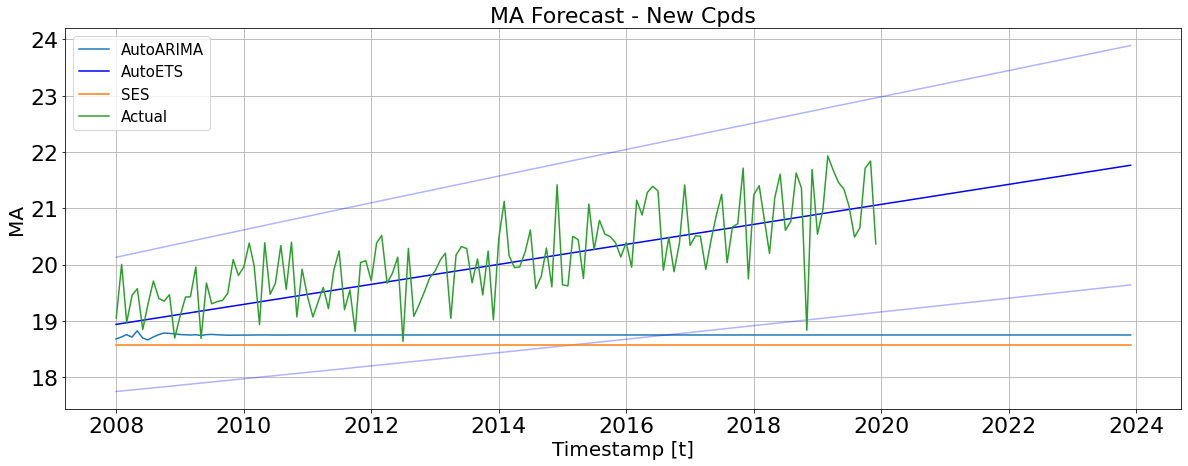

In [63]:
fig, ax = plt.subplots(1, 1, figsize = (20, 7))

plt.plot(Y_hatNEW_df["ds"], Y_hatNEW_df["AutoARIMA"], label="AutoARIMA")
plt.plot(Y_hatNEW_df["ds"], Y_hatNEW_df["AutoETS"], label="AutoETS", color="blue")
plt.plot(Y_hatNEW_df["ds"], Y_hatNEW_df["AutoETS-lo-95"], color="blue", alpha=0.3)
plt.plot(Y_hatNEW_df["ds"], Y_hatNEW_df["AutoETS-hi-95"], color="blue", alpha=0.3)

plt.plot(Y_hatNEW_df["ds"], Y_hatNEW_df["SES"], label="SES")

plt.plot(Y_testNEW_df["ds"], Y_testNEW_df["y"], label="Actual")

#plot_df = pd.concat([Y_train_df, Y_hat_df]).set_index('ds')
# plot_df[['y', 'AutoARIMA', 'ETS']].plot(ax=ax, linewidth=2)

ax.set_title('MA Forecast - New Cpds', fontsize=22)
ax.set_ylabel('MA', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

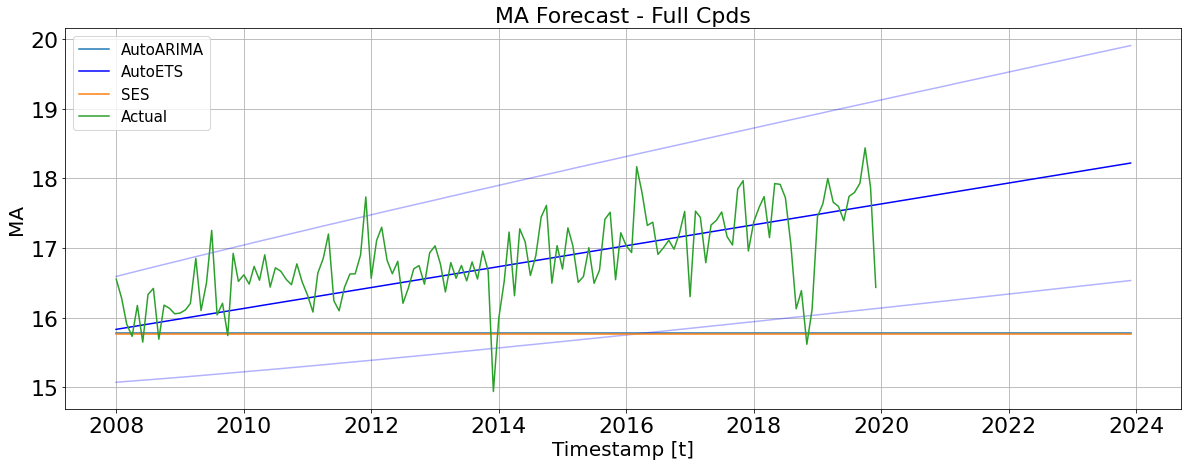

In [64]:
fig, ax = plt.subplots(1, 1, figsize = (20, 7))

plt.plot(Y_hatFULL_df["ds"], Y_hatFULL_df["AutoARIMA"], label="AutoARIMA")
plt.plot(Y_hatFULL_df["ds"], Y_hatFULL_df["AutoETS"], label="AutoETS", color="blue")
plt.plot(Y_hatFULL_df["ds"], Y_hatFULL_df["AutoETS-lo-95"], color="blue", alpha=0.3)
plt.plot(Y_hatFULL_df["ds"], Y_hatFULL_df["AutoETS-hi-95"], color="blue", alpha=0.3)

plt.plot(Y_hatFULL_df["ds"], Y_hatFULL_df["SES"], label="SES")

plt.plot(Y_testFULL_df["ds"], Y_testFULL_df["y"], label="Actual")

#plot_df = pd.concat([Y_train_df, Y_hat_df]).set_index('ds')
# plot_df[['y', 'AutoARIMA', 'ETS']].plot(ax=ax, linewidth=2)

ax.set_title('MA Forecast - Full Cpds', fontsize=22)
ax.set_ylabel('MA', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

In [81]:
print(list(Y_hatNEW_df["ds"])[-35:])

[Timestamp('2021-01-31 00:00:00'), Timestamp('2021-02-28 00:00:00'), Timestamp('2021-03-31 00:00:00'), Timestamp('2021-04-30 00:00:00'), Timestamp('2021-05-31 00:00:00'), Timestamp('2021-06-30 00:00:00'), Timestamp('2021-07-31 00:00:00'), Timestamp('2021-08-31 00:00:00'), Timestamp('2021-09-30 00:00:00'), Timestamp('2021-10-31 00:00:00'), Timestamp('2021-11-30 00:00:00'), Timestamp('2021-12-31 00:00:00'), Timestamp('2022-01-31 00:00:00'), Timestamp('2022-02-28 00:00:00'), Timestamp('2022-03-31 00:00:00'), Timestamp('2022-04-30 00:00:00'), Timestamp('2022-05-31 00:00:00'), Timestamp('2022-06-30 00:00:00'), Timestamp('2022-07-31 00:00:00'), Timestamp('2022-08-31 00:00:00'), Timestamp('2022-09-30 00:00:00'), Timestamp('2022-10-31 00:00:00'), Timestamp('2022-11-30 00:00:00'), Timestamp('2022-12-31 00:00:00'), Timestamp('2023-01-31 00:00:00'), Timestamp('2023-02-28 00:00:00'), Timestamp('2023-03-31 00:00:00'), Timestamp('2023-04-30 00:00:00'), Timestamp('2023-05-31 00:00:00'), Timestamp('20

Text(0, 0.5, 'Assembly Index')

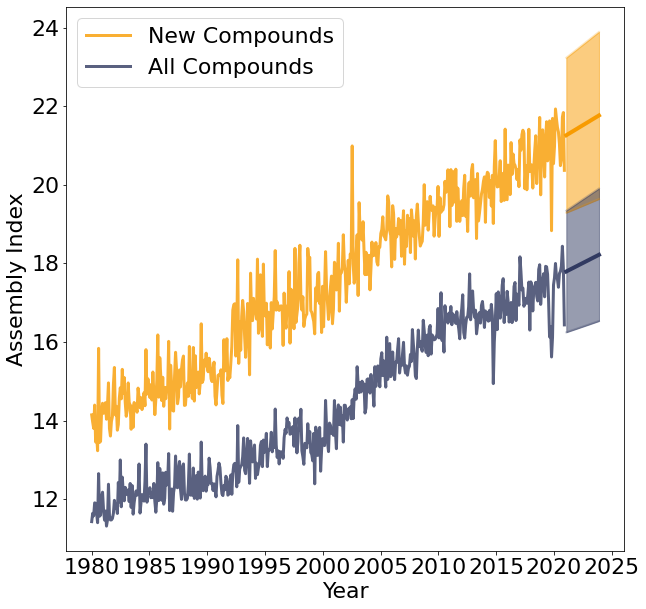

In [88]:
#Assembly values with standard deviation & predicted values (from autoETS)
plt.figure(figsize=(10,10))

new_color = "#f89b00"
full_color= "#313a61"
xs = pd.date_range(start = "1980-01-01", end = "2020-12-01", periods = 480).to_pydatetime().tolist()

plt.plot(xs, new_stats["MA_assemblyGo"]["mean"], color=new_color,
            linewidth=3, markersize=10, alpha=0.8, label="New Compounds")

#New cpd prediction
plt.plot(list(Y_hatNEW_df["ds"])[-35:], list(Y_hatNEW_df["AutoETS"])[-35:], color=new_color,
    linewidth=4)
plt.plot(list(Y_hatNEW_df["ds"])[-35:], list(Y_hatNEW_df["AutoETS-lo-95"])[-35:], color=new_color,
    linewidth=2, alpha=0.25)
plt.plot(list(Y_hatNEW_df["ds"])[-35:], list(Y_hatNEW_df["AutoETS-hi-95"])[-35:], color=new_color,
    linewidth=2, alpha=0.25)

plt.fill_between(list(Y_hatNEW_df["ds"])[-35:], list(Y_hatNEW_df["AutoETS-lo-95"])[-35:], list(Y_hatNEW_df["AutoETS-hi-95"])[-35:], 
    color=new_color, alpha=0.5)


#Full cpd plotting
plt.plot(xs, full_stats["MA_assemblyGo"]["mean"], color=full_color,
            linewidth=3, markersize=10, alpha=0.8, label="All Compounds")

#Full cpd prediction
plt.plot(list(Y_hatFULL_df["ds"])[-35:], list(Y_hatFULL_df["AutoETS"])[-35:], color=full_color,
    linewidth=4)
plt.plot(list(Y_hatFULL_df["ds"])[-35:], list(Y_hatFULL_df["AutoETS-lo-95"])[-35:], color=full_color,
    linewidth=2, alpha=0.25)
plt.plot(list(Y_hatFULL_df["ds"])[-35:], list(Y_hatFULL_df["AutoETS-hi-95"])[-35:], color=full_color,
    linewidth=2, alpha=0.25)

plt.fill_between(list(Y_hatFULL_df["ds"])[-35:], list(Y_hatFULL_df["AutoETS-lo-95"])[-35:], list(Y_hatFULL_df["AutoETS-hi-95"])[-35:], 
    color=full_color, alpha=0.5)

plt.legend()
plt.xlabel("Year")
plt.ylabel("Assembly Index")

## Try simple exponential smoothing

From statsforecast (for now): https://nixtla.github.io/statsforecast/models.html#exponentialsmoothing

In [91]:
models = [
SimpleExponentialSmoothing(0.2)
]

model = StatsForecast(
df=Y_train_df,
models=models,
freq='M',
n_jobs=-1)

In [118]:
Y_hat_df = model.forecast(horizon).reset_index()
Y_hat_df.head()


,unique_id,ds,SES
0,0,1980-01-31,14.143757
1,0,1980-02-29,14.143757
2,0,1980-03-31,14.143757
3,0,1980-04-30,14.143757
4,0,1980-05-31,14.143757


In [119]:
y_hat_ds = list(set(list(Y_hat_df["ds"])))
Y_hat_df_2 = Y_hat_df.groupby("unique_id")


In [125]:
print(Y_hat_df_2.head())
print(list(Y_hat_df[Y_hat_df["unique_id"] == 335]["SES"]))

       unique_id         ds        SES
0              0 1980-01-31  14.143757
1              0 1980-02-29  14.143757
2              0 1980-03-31  14.143757
3              0 1980-04-30  14.143757
4              0 1980-05-31  14.143757
...          ...        ...        ...
48240        335 2007-12-31  18.562628
48241        335 2008-01-31  18.562628
48242        335 2008-02-29  18.562628
48243        335 2008-03-31  18.562628
48244        335 2008-04-30  18.562628

[1680 rows x 3 columns]
[18.5626277923584, 18.5626277923584, 18.5626277923584, 18.5626277923584, 18.5626277923584, 18.5626277923584, 18.5626277923584, 18.5626277923584, 18.5626277923584, 18.5626277923584, 18.5626277923584, 18.5626277923584, 18.5626277923584, 18.5626277923584, 18.5626277923584, 18.5626277923584, 18.5626277923584, 18.5626277923584, 18.5626277923584, 18.5626277923584, 18.5626277923584, 18.5626277923584, 18.5626277923584, 18.5626277923584, 18.5626277923584, 18.5626277923584, 18.5626277923584, 18.5626277923584, 18

In [117]:
print(len(y_hat_ds))
print(len(Y_hat_df))

479
336


ValueError: x and y must be the same size

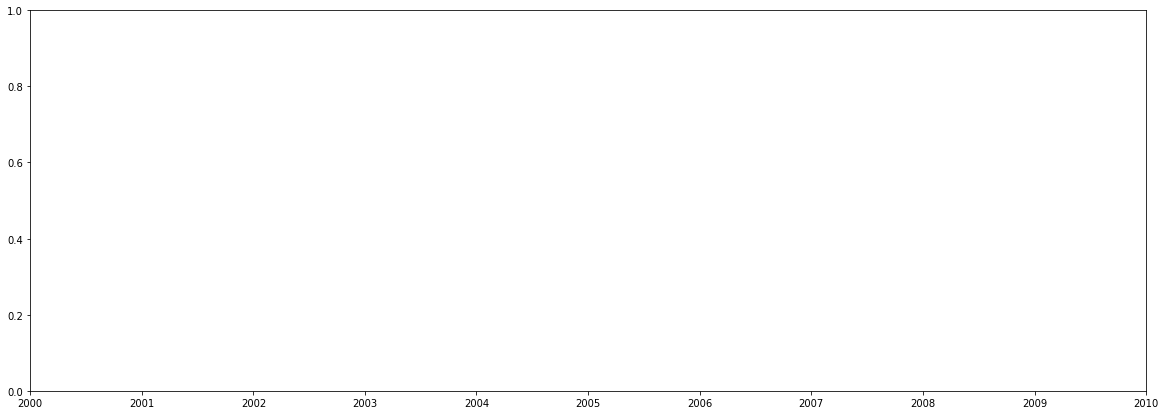

In [111]:
fig, ax = plt.subplots(1, 1, figsize = (20, 7))

#Plot SES
plt.scatter(y_hat_ds, Y_hat_df["SES"]["mean"], label="SES")

#Plot actual Y
plt.plot(Y_train_df["ds"], Y_train_df["y"], label="Y", color="orange")
plt.plot(Y_test_df["ds"], Y_test_df["y"], color="orange")

ax.set_title('Forecast Synthetic Data', fontsize=22)
ax.set_ylabel('Number', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

# New / Total Compound Assemblies (Monte Carlo)

There are varying numbers of compounds for each month - so it's necessary to make separate lists for each month. These are stored in a dictionary {month: [assembly values]}

### Plotting

Plot mean, standard deviation, other data for each month

Using two files = fullCpds_ & newCpds_AssemblyValues.csv in Data/AssemblyValues

Goal = get average & std MA, as well as average avg MW, for each month

In [6]:
full_df = pd.read_csv("Data/AssemblyValues/fullCpds_AssemblyValues.csv")
new_df = pd.read_csv("Data/AssemblyValues/newCpds_AssemblyValues.csv")
print(full_df.head())
print("----------------------------------")
print(new_df.head())

   Unnamed: 0    month                                              inchi  ai  \
0           0  1980-01  InChI=1S/C18H36O2.Mg/c1-2-3-4-5-6-7-8-9-10-11-...   8   
1           1  1980-01  InChI=1S/C50H71N13O12/c1-5-28(4)41(47(72)59-36...  77   
2           2  1980-01  InChI=1S/C11H18N2O3.Na/c1-4-6-7(3)11(5-2)8(14)...  13   
3           3  1980-01  InChI=1S/C10H11ClO/c1-8(12)2-3-9-4-6-10(11)7-5...   8   
4           4  1980-01  InChI=1S/C14H11Cl2NO2/c15-10-5-3-6-11(16)14(10...  14   

            mw  
0   308.256572  
1  1045.534515  
2   248.113687  
3   182.049843  
4   295.016684  
----------------------------------
   Unnamed: 0    month                                              inchi  ai  \
0           0  1980-01  InChI=1S/C10H14O4/c1-7(2-3-8-4-12-8)10(11)14-6...  10   
1           1  1980-01  InChI=1S/C15H10O5/c16-9-3-1-8(2-4-9)15-13(19)7...  14   
2           2  1980-01  InChI=1S/C10H18N4O4S3/c1-7(19-5)11-17-9(15)13(...  18   
3           3  1980-01  InChI=1S/C7H13NO/c1-2-4-7-6(

In [8]:
#Average MA values per month
full_stats = full_df.groupby(["month"]).agg({"ai":["mean","std"],"mw":["mean"]})
new_stats = new_df.groupby(["month"]).agg({"ai":["mean","std"],"mw":["mean"]})

print(full_stats)
print("----------------------------------")
print(new_stats)

                ai                     mw
              mean        std        mean
month                                    
1980-01  14.542477   8.578500  288.903786
1980-02  14.957113   9.432218  296.885756
1980-03  14.758230   8.803624  294.906152
1980-04  15.343189   9.410054  301.813923
1980-05  15.006224   9.419604  294.044223
...            ...        ...         ...
2019-08  23.524145  15.969379  404.242385
2019-09  24.048780  18.210526  404.686906
2019-10  24.800403  17.323901  414.404896
2019-11  24.421748  19.445047  413.057041
2019-12  22.172239  16.789918  382.471763

[480 rows x 3 columns]
----------------------------------
                ai                     mw
              mean        std        mean
month                                    
1980-01  17.805846   9.699448  336.580176
1980-02  17.781218   8.823664  337.134343
1980-03  17.573045   8.388716  336.756317
1980-04  17.953608   8.701263  339.631414
1980-05  17.264859  11.150925  336.565682
...            ..

Text(0, 0.5, 'Molecular Weight (Daltons)')

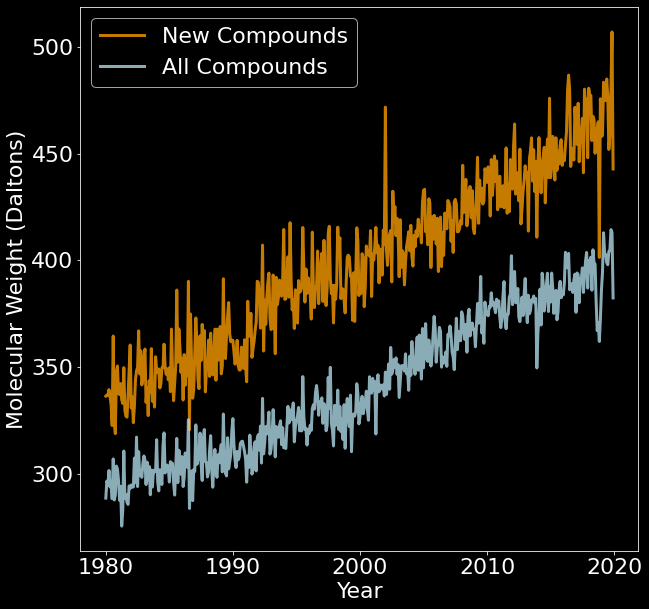

In [11]:
## Avg MA value per month

#Assembly values with standard deviation
plt.figure(figsize=(10,10))

plt.plot(np.arange(1980, 2020, 1/12), new_stats["mw"]["mean"], color="#f89b00",
            linewidth=3, markersize=10, alpha=0.8, label="New Compounds")

plt.plot(np.arange(1980, 2020, 1/12), full_stats["mw"]["mean"], color="lightblue",
            linewidth=3, markersize=10, alpha=0.8, label="All Compounds")

plt.legend()
plt.xlabel("Year")
plt.ylabel("Molecular Weight (Daltons)")

Text(0, 0.5, 'Assembly Index')

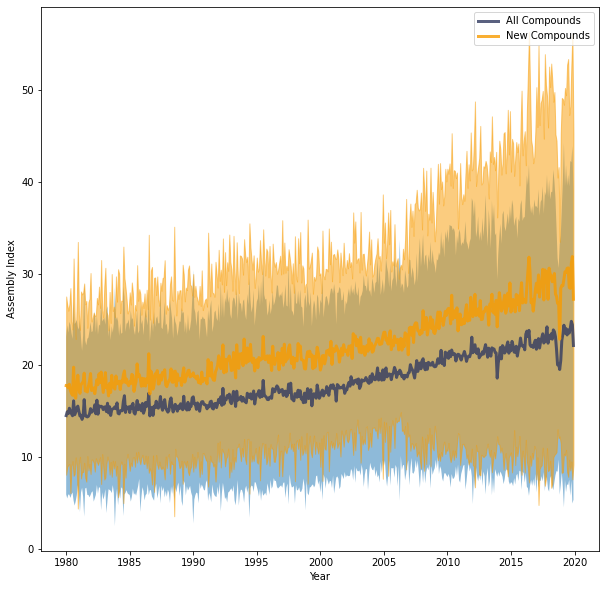

In [11]:
#Assembly values with standard deviation
plt.figure(figsize=(10,10))

# plt.errorbar(np.arange(1980, 2019, 1/12), full_month_avgs, yerr=full_month_stds, color="#313a61",
#             elinewidth=1, linewidth=3, markersize=10, alpha=0.8, label="All Compounds")
plt.plot(np.arange(1980, 2020, 1/12), full_stats["ai"]["mean"], color="#313a61",
            linewidth=3, markersize=10, alpha=0.8, label="All Compounds")
plt.fill_between(np.arange(1980, 2020, 1/12), full_stats["ai"]["mean"] - full_stats["ai"]["std"], 
                full_stats["ai"]["mean"] + full_stats["ai"]["std"], alpha=0.5)

# # plt.errorbar(np.arange(1980, 2019, 1/12), new_month_avgs, yerr=new_month_stds, color="#f89b00",
# #             elinewidth=1, linewidth=3, markersize=10, alpha=0.4, label="New Compounds")

plt.plot(np.arange(1980, 2020, 1/12), new_stats["ai"]["mean"], color="#f89b00",
            linewidth=3, markersize=10, alpha=0.8, label="New Compounds")
plt.fill_between(np.arange(1980, 2020, 1/12), new_stats["ai"]["mean"] - new_stats["ai"]["std"], 
                new_stats["ai"]["mean"] + new_stats["ai"]["std"], alpha=0.5, color="#f89b00")

#plt.axes().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()
plt.xlabel("Year")
plt.ylabel("Assembly Index")

Text(0, 0.5, 'Assembly Index')

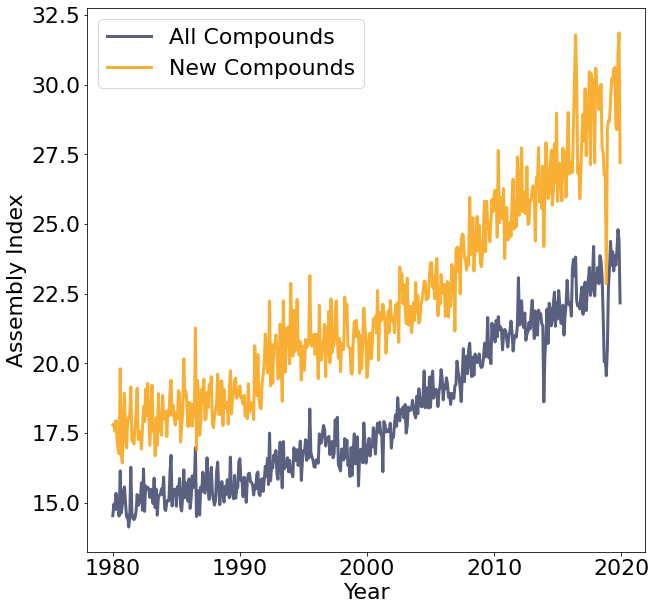

In [22]:
#Assembly values with standard deviation
plt.figure(figsize=(10,10))

plt.plot(np.arange(1980, 2020, 1/12), full_stats["ai"]["mean"], color="#313a61",
            linewidth=3, markersize=10, alpha=0.8, label="All Compounds")

plt.plot(np.arange(1980, 2020, 1/12), new_stats["ai"]["mean"], color="#f89b00",
            linewidth=3, markersize=10, alpha=0.8, label="New Compounds")

plt.legend()
plt.xlabel("Year")
plt.ylabel("Assembly Index")

## Expected Assembly Values

Based on linear regression of a large assortment of assembly values (in ~/Lab/AssemblyValues/)

x = 0.0456; b = 2.4826

In [27]:
#Add a "expected assembly value" column to each results dataframe
full_stats["ExpectedMA"] = 2.4826 + 0.0456*full_stats["mw"]["mean"]
new_stats["ExpectedMA"] = 2.4826 + 0.0456*new_stats["mw"]["mean"]

Text(0, 0.5, 'Assembly Index')

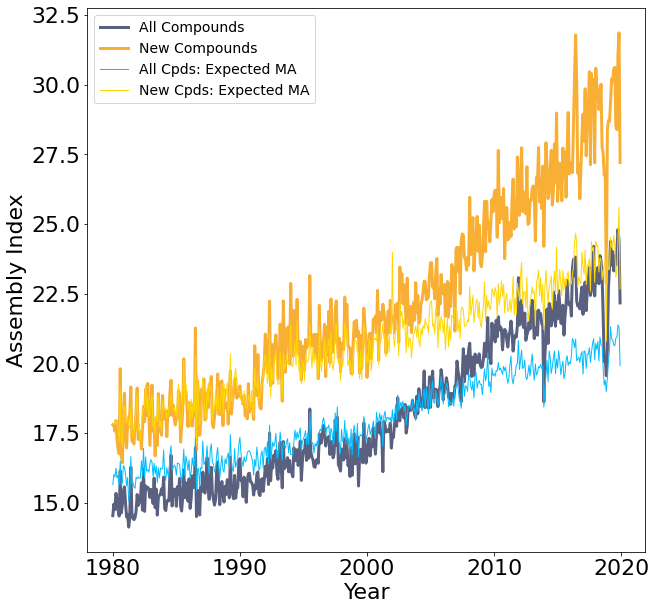

In [34]:
#Assembly values with standard deviation
plt.figure(figsize=(10,10))

xs = np.arange(1980, 2020, 1/12)

#Average assembly Values
plt.plot(xs, full_stats["ai"]["mean"], color="#313a61",
            linewidth=3, markersize=10, alpha=0.8, label="All Compounds")

plt.plot(xs, new_stats["ai"]["mean"], color="#f89b00",
            linewidth=3, markersize=10, alpha=0.8, label="New Compounds")

#Expected MA values
plt.plot(xs, full_stats["ExpectedMA"], color="deepskyblue", linewidth=1, label="All Cpds: Expected MA")
plt.plot(xs, new_stats["ExpectedMA"], color="gold", linewidth=1, label="New Cpds: Expected MA")

plt.legend(prop={"size":14})
plt.xlabel("Year")
plt.ylabel("Assembly Index")

# Stats on assembly distributions

Perform statistics to test:

- Normality of distributions
- Significance of difference between new & full MA distributions

In [18]:
#Get lists of all MA values for each month
full_MA = full_df.groupby("month").agg({"ai":list})
new_MA = new_df.groupby("month").agg({"ai":list})

print(new_MA)

                                                        ai
month                                                     
1980-01  [10, 14, 18, 7, 8, 9, 17, 5, 8, 7, 13, 12, 11,...
1980-02  [9, 9, 7, 30, 5, 14, 6, 9, 8, 22, 8, 21, 10, 2...
1980-03  [19, 10, 23, 12, 11, 14, 6, 8, 10, 15, 15, 19,...
1980-04  [34, 35, 24, 22, 17, 6, 9, 9, 11, 13, 12, 6, 5...
1980-05  [8, 18, 5, 6, 31, 7, 8, 12, 9, 21, 17, 18, 13,...
...                                                    ...
2019-08  [42, 61, 76, 21, 17, 30, 26, 17, 18, 24, 27, 2...
2019-09  [22, 34, 29, 29, 32, 33, 21, 18, 27, 29, 20, 1...
2019-10  [14, 14, 13, 24, 19, 21, 16, 26, 22, 23, 11, 6...
2019-11  [15, 34, 73, 28, 56, 61, 28, 28, 29, 14, 29, 2...
2019-12  [7, 28, 49, 28, 16, 15, 21, 15, 14, 12, 13, 31...

[480 rows x 1 columns]


## Test for Normality

Test each distribution for normal distribution

Text(0.5, 1.0, 'New Cpds, 1980-01')

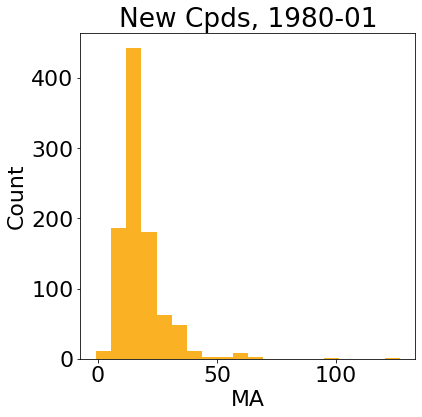

In [38]:
#Plot 1980 & 2019 for both datasets
plt.figure(figsize=(6,6))

plt.hist(new_MA.loc["1980-01"]["ai"], bins=20, color=colors["new"])

plt.xlabel("MA")
plt.ylabel("Count")
plt.title("New Cpds, 1980-01")

In [ ]:
for month, row in new_MA.iterrows():
    print(month)

    print(stats.shapiro(row["ai"]))
    print()


## Test difference between distributions

Is there a significant difference between full and new MA distributions within each month?

In [42]:
#Mann-Whitney U rank test (non-parametric)
months = build_month_increments(1980, 2019)

for month in months[0:12]:
    print(stats.mannwhitneyu(full_MA.loc[month]["ai"], new_MA.loc[month]["ai"]))

MannwhitneyuResult(statistic=341046.5, pvalue=4.511971652068771e-25)
MannwhitneyuResult(statistic=346974.5, pvalue=1.4222405157820336e-21)
MannwhitneyuResult(statistic=356178.5, pvalue=5.402311037826035e-21)
MannwhitneyuResult(statistic=348704.0, pvalue=6.434678202030446e-20)
MannwhitneyuResult(statistic=377746.5, pvalue=3.719511629092984e-12)
MannwhitneyuResult(statistic=376241.0, pvalue=5.628169663383528e-17)
MannwhitneyuResult(statistic=353232.0, pvalue=4.19446663391659e-19)
MannwhitneyuResult(statistic=359116.0, pvalue=8.40243821615334e-21)
MannwhitneyuResult(statistic=362088.5, pvalue=4.6886455470052366e-17)
MannwhitneyuResult(statistic=361537.5, pvalue=2.1541743396872751e-16)
MannwhitneyuResult(statistic=367975.5, pvalue=2.295500637851385e-17)
MannwhitneyuResult(statistic=385028.5, pvalue=1.7137172972616657e-14)


In [ ]:
#z-test (assumes normality, but from https://www.researchgate.net/post/Hello-could-you-please-share-with-me-the-formula-of-Mann-Whitney-U-Test-critical-values-for-large-samples-n100, at large values of n, parametric tests can be used)
months = build_month_increments(1980, 2019)

for month in months:
    #Null hypothesis - no difference between the distributions (therefore, if p-value is <0.5, then the distributions are different)
    zstat, pval = ztest(full_MA.loc[month]["ai"], new_MA.loc[month]["ai"], value=0) 
    if pval > 0.05:
        print(month, "is not significantly different")
    else:
        print(month + "," +str(zstat) + "," + str(pval))

### Wasserstein Distancxe

Find monthly & average wasserstein distance between each distribution

In [61]:
months = build_month_increments(1980, 2019)
w_dist = []

for month in months:
    w_dist.append(stats.wasserstein_distance(full_MA.loc[month]["ai"], new_MA.loc[month]["ai"]))

print("Average Wasserstein distance:", np.mean(w_dist))

Average Wasserstein distance: 4.115881048100523


Text(0, 0.5, 'Wasserstein Distance')

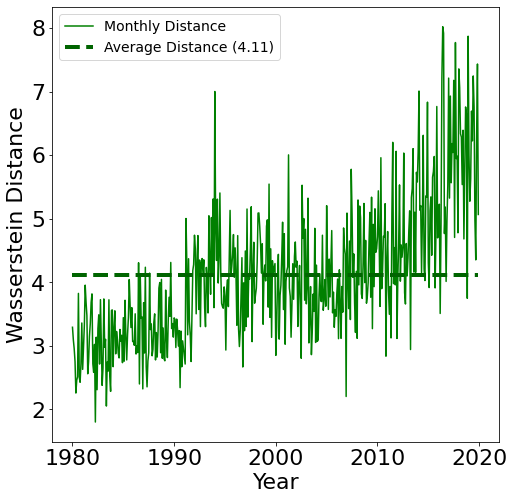

In [75]:
plt.figure(figsize=(8,8))

xs = np.arange(1980, 2020, 1/12)

plt.plot(xs, w_dist, color="green", label="Monthly Distance")
plt.plot(xs, [np.mean(w_dist)]*len(xs), color="darkgreen", linestyle="--", linewidth=4, label="Average Distance (4.11)")

plt.legend(prop={"size":14})
plt.xlabel("Year")
plt.ylabel("Wasserstein Distance")

# Changing Compounds Assemblies

Analyze the assembly values of fast-changing (min & max percentiles) compounds

Sets to analyze:
1. Compounds in 99.99th percentile
2. Changing compounds, 99.99th percentile (maxPercentile_0.01_99.99*)
3. Changing compounds, below 0.01st percentile (minPercentile_0.01_99.99*)
4. Changing compounds, 99.9th percentile (maxPercentile_0.1_99.9*)
5. Changing compounds, below 0.1st percentile (minPercentile_0.1_99.9*) 

In [4]:
## Matplotlib defaults ##
colors = {"1980": "#aa0f35", 
         "1985": "#fdc799",
         "1990": "#abdbfc",
         "1995": "#a0a75c",
         "2000": "#603734",
         "2005": "#009ecb",
         "2010": "#430057",
         "2015": "#f89b00"}

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rcParams.update({'font.size': 22})

### Compounds in 99.99th percentile 

Plot & analyze the most connected compounds in SureChemBL

------  (2015, 2019) -----
DescribeResult(nobs=722, minmax=(1, 119), mean=15.637119113573407, variance=256.75579085680477, skewness=3.308937717875287, kurtosis=12.829833350312803)
------  (2010, 2014) -----
DescribeResult(nobs=695, minmax=(1, 119), mean=15.751079136690647, variance=284.97973586548625, skewness=3.264398959689537, kurtosis=11.761944878282671)
------  (2005, 2009) -----
DescribeResult(nobs=540, minmax=(1, 119), mean=17.15, variance=354.5655844155844, skewness=2.748878893799469, kurtosis=7.721047532280789)
------  (2000, 2004) -----
DescribeResult(nobs=265, minmax=(1, 100), mean=16.60377358490566, variance=346.93710691823895, skewness=2.4396828094647396, kurtosis=5.448874109651744)
------  (1995, 1999) -----
DescribeResult(nobs=163, minmax=(2, 87), mean=15.50920245398773, variance=322.7082481254261, skewness=2.2988947899026977, kurtosis=4.296780402120956)
------  (1990, 1994) -----
DescribeResult(nobs=126, minmax=(3, 87), mean=16.73015873015873, variance=393.7986031746031,

Text(0, 0.5, 'Compound Density')

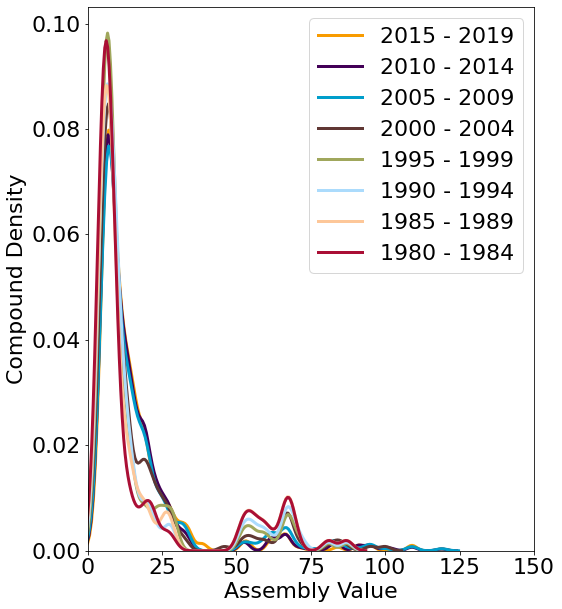

In [48]:
pairs = [(1980, 1984), (1985,1989), (1990,1994), (1995,1999), (2000,2004), (2005,2009), (2010,2014), (2015,2019)]

full_ais = []

plt.figure(figsize=(8,10))

for pair in reversed(pairs):
    print("------ ", pair, "-----")
    start = pair[0]
    stop = pair[1]
    ids = pickle.load(file=open("Data/Cpd_Data/ids_above99_99percentile" + str(start) + "_" + 
                                str(stop) + "cpdData_assembly.p", "rb"))
    
    ais = []
    for cpd in ids:
        ais.append(cpd["ai"])
        
    #Remove -1s
    ais = [x for x in ais if x != -1]
    full_ais.append(ais)

    print(stats.describe(ais))
    
    #plt.hist(ais, bins=100, color=colors[str(start)], label= str(start) + " - " + str(stop))
    sns.kdeplot(ais, bw_method=0.1, color=colors[str(start)], label= str(start) + " - " + str(stop), linewidth=3)

plt.legend()
plt.xlim(0,150)
plt.xlabel("Assembly Value")
plt.ylabel("Compound Density")

In [54]:
combos = itertools.combinations(range(0,len(full_ais)), 2)
for combo in combos:
    print(combo)
    print(stats.ks_2samp(full_ais[combo[0]], full_ais[combo[1]]))
    print(stats.anderson_ksamp([full_ais[combo[0]], full_ais[combo[1]]]))
    print("Wasserstein Distance:", stats.wasserstein_distance(full_ais[combo[0]], full_ais[combo[1]]))
    print()

(0, 1)
KstestResult(statistic=0.011891428685306602, pvalue=0.9999999977077801)
Anderson_ksampResult(statistic=-1.0699860338119844, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
Wasserstein Distance: 0.5383247972259305

(0, 2)
KstestResult(statistic=0.03345644813788858, pvalue=0.864307761582229)
Anderson_ksampResult(statistic=-0.7580090187166283, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
Wasserstein Distance: 1.5986713860675081

(0, 3)
KstestResult(statistic=0.07503789264621336, pvalue=0.21189782394499013)
Anderson_ksampResult(statistic=2.095567746527271, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.044571432106303426)
Wasserstein Distance: 2.4402341504207357

(0, 4)
KstestResult(statistic=0.15266896657206463, pvalue=0.00355205398259939)
Anderson_ksampResult(statistic=7.680779381202069, critical_values=array([0.325, 1.226, 1.961,

c:\users\group\anaconda3\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: p-value capped: true value larger than 0.25
  """
c:\users\group\anaconda3\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: p-value floored: true value smaller than 0.001
  """


Anderson_ksampResult(statistic=9.969150247135532, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)
Wasserstein Distance: 4.8081519663993895

(3, 4)
KstestResult(statistic=0.07952309295057298, pvalue=0.5130898912449378)
Anderson_ksampResult(statistic=0.4417356012385059, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.21880182947808205)
Wasserstein Distance: 1.445630281282555

(3, 5)
KstestResult(statistic=0.0746031746031746, pvalue=0.6925072704114961)
Anderson_ksampResult(statistic=0.08146284297910673, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
Wasserstein Distance: 2.2620545073375258

(3, 6)
KstestResult(statistic=0.10302672955974843, pvalue=0.4094223190343369)
Anderson_ksampResult(statistic=0.4713304271827982, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.21247405604335284)
Wasserstein

### Changing compounds, 99.9th percentile 

------  (2015, 2019) -----
DescribeResult(nobs=255, minmax=(2, 72), mean=10.011764705882353, variance=70.38962482630848, skewness=3.9867883140560094, kurtosis=20.504278861694107)

------  (2010, 2014) -----
DescribeResult(nobs=192, minmax=(2, 72), mean=9.916666666666666, variance=75.68935427574172, skewness=4.255366022937834, kurtosis=22.321515447802124)

------  (2005, 2009) -----
DescribeResult(nobs=44, minmax=(3, 59), mean=11.272727272727273, variance=159.69133192389006, skewness=2.8373976748006977, kurtosis=7.087474216438332)

------  (2000, 2004) -----
DescribeResult(nobs=11, minmax=(5, 28), mean=10.272727272727273, variance=41.41818181818182, skewness=2.0420616823932276, kurtosis=3.4622930639371434)

------  (1995, 1999) -----
DescribeResult(nobs=143, minmax=(2, 72), mean=10.23076923076923, variance=94.27735644637053, skewness=4.001581217375285, kurtosis=18.41325504799777)

------  (1990, 1994) -----
DescribeResult(nobs=193, minmax=(2, 72), mean=9.963730569948186, variance=76.587

Text(0, 0.5, 'Compound Density')

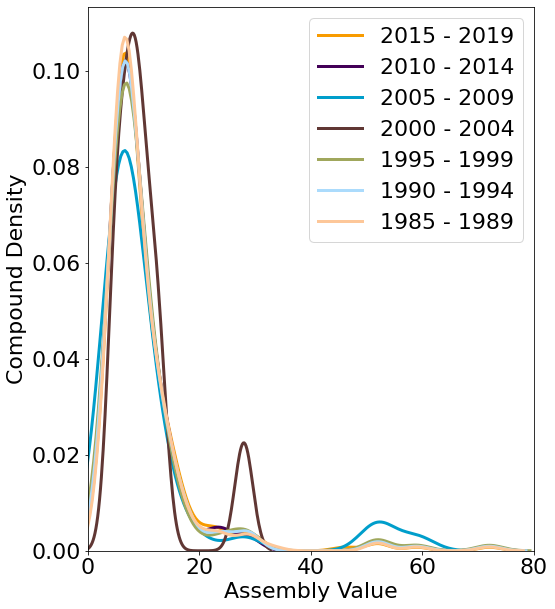

In [49]:
pairs = [(1985,1989), (1990,1994), (1995,1999), (2000,2004), (2005,2009), (2010,2014), (2015,2019)]

full_ais = []

plt.figure(figsize=(8,10))

for pair in reversed(pairs):
    print("------ ", pair, "-----")
    start = pair[0]
    stop = pair[1]
    ids = pickle.load(file=open("Data/Cpd_Data/ids_change_maxPercentile_0.1_99.9_" + str(start-1) + "_" + 
                                str(stop) + "cpdData_assembly.p", "rb"))
    
    ais = []
    for cpd in ids:
        ais.append(cpd["ai"])
        
    #Remove -1s
    ais = [x for x in ais if x != -1]
    full_ais.append(ais)

    print(stats.describe(ais))
    print()
    
    #plt.hist(ais, bins=100, color=colors[str(start)], alpha=0.8, label= str(start-1) + " - " + str(stop))
    sns.kdeplot(ais, bw_method=0.25, color=colors[str(start)], label= str(start) + " - " + str(stop), linewidth=3)
    

plt.legend()
plt.xlim(0,80)
plt.xlabel("Assembly Value")
plt.ylabel("Compound Density")

In [56]:
combos = itertools.combinations(range(0,len(full_ais)), 2)
for combo in combos:
    print(combo)
    print(stats.ks_2samp(full_ais[combo[0]], full_ais[combo[1]]))
    print(stats.anderson_ksamp([full_ais[combo[0]], full_ais[combo[1]]]))
    print("Wasserstein Distance:", stats.wasserstein_distance(full_ais[combo[0]], full_ais[combo[1]]))
    print()

(0, 1)
KstestResult(statistic=0.01997549019607843, pvalue=0.9999999995237022)
Anderson_ksampResult(statistic=-1.2325645468887758, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
Wasserstein Distance: 0.2848039215686279

(0, 2)
KstestResult(statistic=0.08360071301247772, pvalue=0.9325351708624212)
Anderson_ksampResult(statistic=-0.49182366723549, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
Wasserstein Distance: 2.154545454545455

(0, 3)
KstestResult(statistic=0.22923351158645278, pvalue=0.5602536950607762)
Anderson_ksampResult(statistic=-0.7006021084284263, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
Wasserstein Distance: 1.7283422459893059

(0, 4)
KstestResult(statistic=0.02243246949129302, pvalue=0.9999999981044085)
Anderson_ksampResult(statistic=-1.2121593830680966, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.

c:\users\group\anaconda3\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: p-value capped: true value larger than 0.25
  """


### Changing compounds, below 0.1st percentile 


------  (2015, 2019) -----
DescribeResult(nobs=14, minmax=(5, 23), mean=9.214285714285714, variance=19.719780219780223, skewness=2.2753652312810235, kurtosis=4.823006522592599)

------  (2010, 2014) -----
DescribeResult(nobs=33, minmax=(5, 23), mean=8.181818181818182, variance=11.090909090909088, skewness=2.7821910406362513, kurtosis=9.941764226686384)

------  (2005, 2009) -----
DescribeResult(nobs=151, minmax=(3, 53), mean=9.655629139072847, variance=36.84061810154526, skewness=3.627597139606427, kurtosis=18.859142589807984)

------  (2000, 2004) -----
DescribeResult(nobs=389, minmax=(3, 81), mean=10.352185089974293, variance=39.69265629555031, skewness=4.987640846788539, kurtosis=45.03610802378697)

------  (1995, 1999) -----
DescribeResult(nobs=216, minmax=(3, 53), mean=9.787037037037036, variance=32.43815676141257, skewness=3.3281999121769847, kurtosis=17.82198377577295)

------  (1990, 1994) -----
DescribeResult(nobs=434, minmax=(2, 81), mean=10.264976958525345, variance=42.84186

Text(0, 0.5, 'Compound Density')

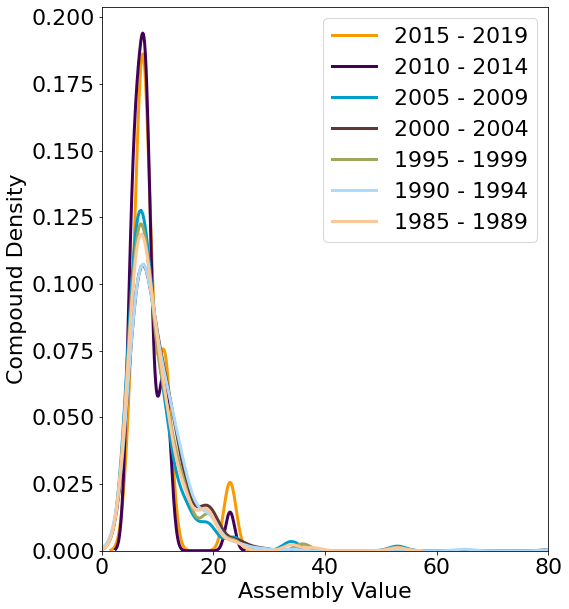

In [50]:
pairs = [(1985,1989), (1990,1994), (1995,1999), (2000,2004), (2005,2009), (2010,2014), (2015,2019)]

full_ais = []

plt.figure(figsize=(8,10))

for pair in reversed(pairs):
    print("------ ", pair, "-----")
    start = pair[0]
    stop = pair[1]
    ids = pickle.load(file=open("Data/Cpd_Data/ids_change_minPercentile_0.1_99.9_" + str(start-1) + "_" + 
                                str(stop) + "cpdData_assembly.p", "rb"))
    
    ais = []
    for cpd in ids:
        ais.append(cpd["ai"])
        
    #Remove -1s
    ais = [x for x in ais if x != -1]
    full_ais.append(ais)

    print(stats.describe(ais))
    print()
    
    #plt.hist(ais, bins=100, color=colors[str(start)], alpha=0.8, label= str(start-1) + " - " + str(stop))
    sns.kdeplot(ais, bw_method=0.25, color=colors[str(start)], label= str(start) + " - " + str(stop), linewidth=3)
    

plt.legend()
plt.xlim(0,80)
plt.xlabel("Assembly Value")
plt.ylabel("Compound Density")

In [58]:
combos = itertools.combinations(range(0,len(full_ais)), 2)
for combo in combos:
    print(combo)
    print(stats.ks_2samp(full_ais[combo[0]], full_ais[combo[1]]))
    print(stats.anderson_ksamp([full_ais[combo[0]], full_ais[combo[1]]]))
    print("Wasserstein Distance:", stats.wasserstein_distance(full_ais[combo[0]], full_ais[combo[1]]))
    print()

(0, 1)
KstestResult(statistic=0.16017316017316016, pvalue=0.9137835326059303)
Anderson_ksampResult(statistic=-0.6886537335030235, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
Wasserstein Distance: 1.0324675324675323

(0, 2)
KstestResult(statistic=0.16177861873226113, pvalue=0.8342558375814302)
Anderson_ksampResult(statistic=-0.8290556286861674, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
Wasserstein Distance: 1.1556291390728484

(0, 3)
KstestResult(statistic=0.15956665442526624, pvalue=0.8283453243806849)
Anderson_ksampResult(statistic=-0.33110729841668524, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
Wasserstein Distance: 1.6972089607051064

(0, 4)
KstestResult(statistic=0.14417989417989419, pvalue=0.9095928141227335)
Anderson_ksampResult(statistic=-0.7078635438065096, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752

c:\users\group\anaconda3\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: p-value capped: true value larger than 0.25
  """


## Assembly / Degree Correlation

In [10]:
#Read in assembly data
data = pickle.load(file=open("Data/AssemblyDegreeCorr/TESTFULLIDS_assemblyValues.p", "rb"))
data = data[0]


<class 'list'>
9271
{'mc_ai': 10, 'frag_ai': 9, 'inchi': 'InChI=1S/C14H10O2/c15-13(11-7-3-1-4-8-11)14(16)12-9-5-2-6-10-12/h1-10H'}


In [32]:
#Read in degree data (I think...)
degree_df = pd.read_csv("Data/AssemblyDegreeCorr/sample_byDegreeQuantile_2019-12.csv")
degree_df = degree_df.rename({"Unnamed: 0": "SureChEMBL_ID"}, axis=1)
print(degree_df)

structure_df = pd.read_csv("Data/AssemblyDegreeCorr/sample_TESTFULLIDS_2019-12.csv")
print(structure_df)

        SureChEMBL_ID  Degree  quantile
0       SCHEMBL121895       4         0
1       SCHEMBL249368      17         0
2     SCHEMBL14695391       9         0
3      SCHEMBL1418691      19         0
4      SCHEMBL4394698      11         0
...               ...     ...       ...
9370     SCHEMBL83796   17996        49
9371     SCHEMBL37162   18007        49
9372     SCHEMBL25918   18603        49
9373     SCHEMBL27798   21644        49
9374     SCHEMBL26078   16948        49

[9375 rows x 3 columns]
      Unnamed: 0    SureChEMBL_ID  \
0             26        SCHEMBL66   
1            106       SCHEMBL220   
2            133       SCHEMBL263   
3            218       SCHEMBL398   
4            229       SCHEMBL414   
...          ...              ...   
9266    19781913  SCHEMBL21610045   
9267    19781938  SCHEMBL21610072   
9268    19781970  SCHEMBL21610105   
9269    19781974  SCHEMBL21610109   
9270    19781985  SCHEMBL21610120   

                                                 S

In [33]:
#DataFrame of data
ma_df = pd.DataFrame(data)
ma_df = ma_df.rename({"inchi": "InChI"}, axis=1)
print(ma_df)

      mc_ai  frag_ai                                              InChI
0        10        9  InChI=1S/C14H10O2/c15-13(11-7-3-1-4-8-11)14(16...
1         9        7  InChI=1S/C8H4O3/c9-7-5-3-1-2-4-6(5)8(10)11-7/h...
2        11       10  InChI=1S/C19H15Br/c20-19(16-10-4-1-5-11-16,17-...
3         4        6   InChI=1S/C6H14O3/c1-7-3-5-9-6-4-8-2/h3-6H2,1-2H3
4        10        9  InChI=1S/C10H10N2/c1-2-4-10(5-3-1)8-12-7-6-11-...
...     ...      ...                                                ...
9266     16       14  InChI=1S/C25H37N/c1-15(2)22-14-21(12-19(8)23(2...
9267      8        7  InChI=1S/C7H16N2OS/c1-8-3-4-9(11)7(6-8)2-5-10/...
9268     34       34  InChI=1S/C30H35ClFN7O3/c1-17(2)39-27(18(3)15-3...
9269     12       11  InChI=1S/C10H22N2O2S/c1-9(15)7-12(5-6-14-4)8-1...
9270     25       20  InChI=1S/C26H25ClFN3OS/c1-4-9-30-13-15(2)31(16...

[9271 rows x 3 columns]


In [35]:
#merge all dataframes so that MA values align with degrees
df = pd.merge(ma_df, structure_df)
df = pd.merge(df, degree_df)
print(df)

      mc_ai  frag_ai                                              InChI  \
0        10        9  InChI=1S/C14H10O2/c15-13(11-7-3-1-4-8-11)14(16...   
1         9        7  InChI=1S/C8H4O3/c9-7-5-3-1-2-4-6(5)8(10)11-7/h...   
2        11       10  InChI=1S/C19H15Br/c20-19(16-10-4-1-5-11-16,17-...   
3         4        6   InChI=1S/C6H14O3/c1-7-3-5-9-6-4-8-2/h3-6H2,1-2H3   
4        10        9  InChI=1S/C10H10N2/c1-2-4-10(5-3-1)8-12-7-6-11-...   
...     ...      ...                                                ...   
9274     16       14  InChI=1S/C25H37N/c1-15(2)22-14-21(12-19(8)23(2...   
9275      8        7  InChI=1S/C7H16N2OS/c1-8-3-4-9(11)7(6-8)2-5-10/...   
9276     34       34  InChI=1S/C30H35ClFN7O3/c1-17(2)39-27(18(3)15-3...   
9277     12       11  InChI=1S/C10H22N2O2S/c1-9(15)7-12(5-6-14-4)8-1...   
9278     25       20  InChI=1S/C26H25ClFN3OS/c1-4-9-30-13-15(2)31(16...   

      Unnamed: 0    SureChEMBL_ID  \
0             26        SCHEMBL66   
1            106       SC

In [36]:
#Correlation between mc_ai, frag_ai, and Degree
df.corr()

,mc_ai,frag_ai,Unnamed: 0,Degree,quantile
mc_ai,1.000000,0.497689,0.372811,-0.018356,0.058976
frag_ai,0.497689,1.000000,0.334580,0.007958,0.101778
Unnamed: 0,0.372811,0.334580,1.000000,-0.182788,0.020152
Degree,-0.018356,0.007958,-0.182788,1.000000,0.491245
quantile,0.058976,0.101778,0.020152,0.491245,1.000000


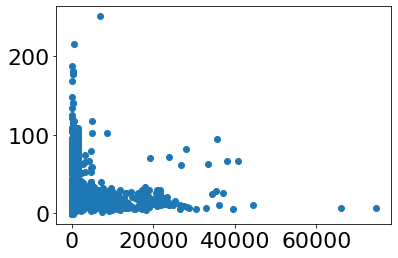

In [39]:
#Visual representation of 0 correlation (lol)
plt.Figure(figsize=(8,8))
plt.scatter(df["Degree"], df["mc_ai"])

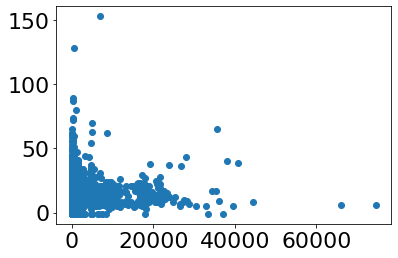

In [40]:
plt.Figure(figsize=(8,8))
plt.scatter(df["Degree"], df["frag_ai"])

Note for later - maybe there's something here, or at least a bound of MA values as degree increases?

## Fragment analysis

Do the number / diversity of fragments within the assembly code increase as time goes on? Could this explain MA increase?

In [9]:
### TESTING - need to see if two igraph graphs (C-C=C and C=C-C) are isomorphic

g1 = ig.Graph(3)
g2 = ig.Graph(3)

In [10]:
g1.add_edges([(0,1), (1, 2)])
g2.add_edges([(0,1), (1, 2)])

print(g1)
print("------")
print(g2)

IGRAPH U--- 3 2 --
+ edges:
0--1 1--2
------
IGRAPH U--- 3 2 --
+ edges:
0--1 1--2


In [11]:
#Add edge & vertex colors
g1.vs["color"] = ["C", "C", "C"]
g1.es["color"] = ["single", "double"]

g2.vs["color"] = ["C", "C", "C"]
g2.es["color"] = ["double", "single"]

In [21]:
#Check regular isomorphic (should be true)
print("G1 - iso - G2:", g1.isomorphic(g2))

#Check including colors (should also be true)
print("G1 - iso with colors - G2:", g1.isomorphic_vf2(g2, color1=[4, 4, 4], color2=[4, 4, 4], edge_color1=[-1, -2], edge_color2=[-2, -1]))


G1 - iso - G2: True
G1 - iso with colors - G2: True


In [25]:
from random import randint

In [29]:
#Speed test
graphs = [g1] * 1000000

iso = []
for g in tqdm(graphs):
    iso.append(g.isomorphic_vf2(g2, color1=[randint(0,10), 4, 4], color2=[4, 4, 4], edge_color1=[randint(0,10), -2], edge_color2=[-2, -1]))

100%|██████████| 1000000/1000000 [00:04<00:00, 241006.41it/s]


In [28]:
print(iso[0:100])

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
